# Data Cleaning
This notebook includes analysis with regards to the data cleaning step that is taken for the earthquake damage dataset.

In [13]:
# enables referencing modules in repository
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from src.features import build_features
# from src.data import make_dataset 
# commented out because: there seems to be an issue at the moment with the initial method from make_dataset
from src.models import train_model
from src.models import predict_model
from src.visualization import visualize

In [14]:
# Loading the data
train_df = pd.read_csv('../data/raw/train_values.csv')

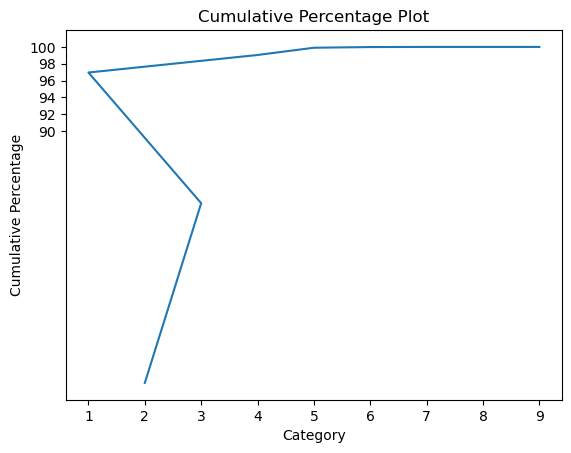

In [15]:
cumulative_sum = train_df['count_floors_pre_eq'].value_counts().sort_values(ascending=False).cumsum()

cumulative_percentage = 100 * cumulative_sum / cumulative_sum.max()

# plot the cumulative percentage
plt.plot(cumulative_percentage.index, cumulative_percentage)

# set the plot title and axis labels
plt.title('Cumulative Percentage Plot')
plt.xlabel('Category')
plt.ylabel('Cumulative Percentage')
yticks = np.arange(90, 102,2)
ylabels = [f"{y:.0f}%" for y in yticks]
plt.yticks(yticks)
# show the plot
plt.show()

Check all categorical features of train_df, if a value of a feature goes above the set threshold, the feature is considered imbalanced.

In [16]:
# threshold between 0 and 1
threshold = 0.9
imbalancedFeatures = build_features.check_dataframe_for_imbalanced_features(train_df, THRESHOLD)
print(imbalancedFeatures)

[]


In [17]:
def create_threshold_hist(df_series, threshold):
    print(f'Threshold: Rows of plan_configuration x {THRESHOLD} = {int(df_series.count() * THRESHOLD)}')
    print(df_series.value_counts())
    
    thresholdLine = threshold * df_series.count()
    df_series.hist()
    plt.axhline(y=thresholdLine, color='r', linestyle='-')
    plt.title(df_series.name)
    plt.ylabel('Count')
    plt.savefig(f'../reports/figures/histogramm_{df_series.name}.svg', format='svg')
    plt.show()

Threshold: Rows of plan_configuration x 0.9 = 234540
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64


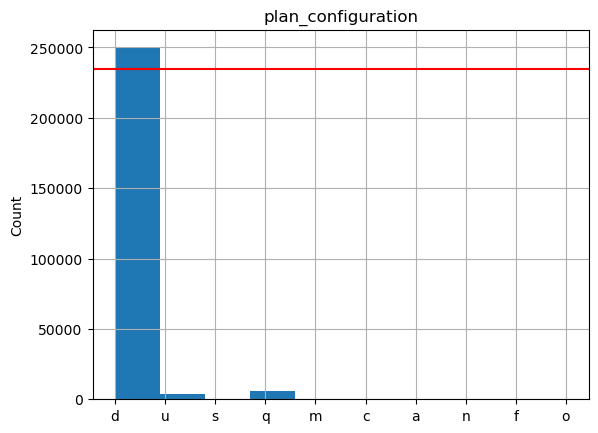

In [18]:
threshold = 0.9
col = 'plan_configuration'
create_threshold_hist(train_df[col], threshold)

The value 'd' of feature plan_configuration occurs more often than the given threshold allows, so this feature will later be dropped.

Threshold: Rows of plan_configuration x 0.9 = 234540
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64


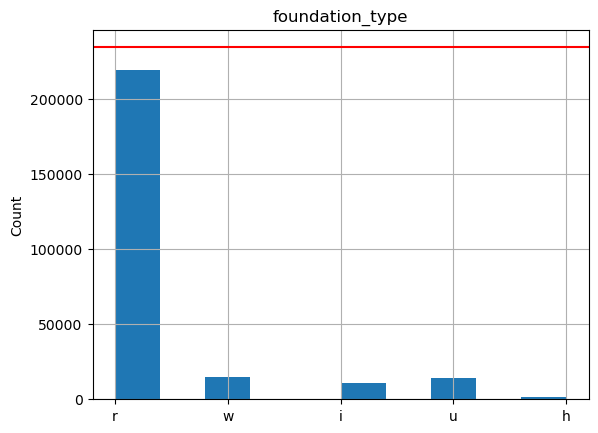

In [19]:
threshold = 0.9
col = 'foundation_type'
create_threshold_hist(train_df[col], threshold)

The values of feature plan_configuration are all below than the given threshold, so the feature won't be dropped.